In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\santh\OneDrive\Desktop\Sooraj S Internship doc\Sooraj S Internship doc\sales_data_sample.csv", index_col=0, encoding='latin1')


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('PRODUCTLINE',axis=1))

ValueError: could not convert string to float: '2/24/2003 0:00'

In [8]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# ✅ Step 1: Convert any date column to datetime safely
for col in df.columns:
    if df[col].dtype == 'object' and df[col].str.contains(r'\d{1,2}/\d{1,2}/\d{4}', na=False).any():
        df[col] = pd.to_datetime(df[col], errors='coerce')
        df['YEAR'] = df[col].dt.year
        df['MONTH'] = df[col].dt.month
        df['DAY'] = df[col].dt.day
        df = df.drop(col, axis=1)
        break  # stop after converting the first likely date column

# ✅ Step 2: Drop all non-numeric columns
df_numeric = df.select_dtypes(include='number')

# ✅ Step 3: Apply StandardScaler safely
scaler = StandardScaler()
scaled = scaler.fit_transform(df_numeric)

# ✅ Step 4: Turn scaled data back into a DataFrame
df_scaled = pd.DataFrame(scaled, columns=df_numeric.columns)
print(df_scaled.head())


   QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES    QTR_ID  MONTH_ID  \
0        -0.522891   0.596978        -1.057059 -0.370825 -1.427039 -1.392909   
1        -0.112201  -0.114450        -0.347015 -0.427897 -0.596243 -0.572337   
2         0.606505   0.549384        -1.057059  0.179443  0.234553 -0.025289   
3         1.017195  -0.019759        -0.110334  0.104701  0.234553  0.248235   
4         1.427884   0.810158         1.783116  0.896740  1.065350  0.795284   

   YEAR_ID      MSRP     YEAR     MONTH       DAY  
0 -1.16517 -0.142246 -1.16517 -1.392909  1.106270  
1 -1.16517 -0.142246 -1.16517 -0.572337 -0.830863  
2 -1.16517 -0.142246 -1.16517 -0.025289 -1.514557  
3 -1.16517 -0.142246 -1.16517  0.248235  1.220219  
4 -1.16517 -0.142246 -1.16517  0.795284 -0.489016  


In [9]:
from sklearn.preprocessing import StandardScaler

# Keep only numeric columns
df_numeric = df.select_dtypes(include='number')

# Drop the target column if it's numeric
df_features = df_numeric.drop('TARGET CLASS', axis=1)

# Fit scaler
scaler = StandardScaler()
scaler.fit(df_features)


KeyError: "['TARGET CLASS'] not found in axis"

In [10]:
df_features = df.select_dtypes(include='number')


In [11]:
print(df.dtypes)


QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
YEAR                  int32
MONTH                 int32
DAY                   int32
dtype: object


In [12]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

KeyError: "['TARGET CLASS'] not found in axis"

In [13]:
x_train,x_test,y_train,y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

NameError: name 'train_test_split' is not defined

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, df['Outcome'], test_size=0.30)


NameError: name 'scaled_features' is not defined

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Keep only numeric columns (auto-removes strings and dates)
df_numeric = df.select_dtypes(include='number')

# Step 2: Drop the target column ('Outcome' in your case)
X = df_numeric.drop('Outcome', axis=1)

# Step 3: Extract the target column
y = df['Outcome']

# Step 4: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Step 5: Train-test split
x_train, x_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.30, random_state=42)

# Optional: print shapes to confirm
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


KeyError: "['Outcome'] not found in axis"

In [17]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, df['SALES'], test_size=0.30, random_state=42)


NameError: name 'scaled_features' is not defined

In [18]:
df_numeric = df.select_dtypes(include='number')

# Step 3: Separate features (X) and target (y)
X = df_numeric.drop('SALES', axis=1)
y = df_numeric['SALES']

# Step 4: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Step 5: Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.30, random_state=42
)

# Optional: check shape
print(x_train.shape, x_test.shape)

(1976, 10) (847, 10)


In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [21]:
knn.fit(x_train,y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [22]:
# Change y to categorical target
y = df['DEALSIZE']

# Re-do the train-test split
x_train, x_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.30, random_state=42
)

# Now classification works
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [23]:
pred = knn.predict(x_test)knn.fit(x_train,y_train)

SyntaxError: invalid syntax (592550731.py, line 1)

In [24]:
knn.fit(x_train, y_train)
pred = knn.predict(x_test)


In [28]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [26]:
print(confusion_matrix(y_test,pred))

[[ 18  37   0]
 [  3 362  40]
 [  0  51 336]]


In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       Large       0.86      0.33      0.47        55
      Medium       0.80      0.89      0.85       405
       Small       0.89      0.87      0.88       387

    accuracy                           0.85       847
   macro avg       0.85      0.70      0.73       847
weighted avg       0.85      0.85      0.84       847



In [30]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())

NameError: name 'df_feat' is not defined

In [31]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())

NameError: name 'df_feat' is not defined

In [32]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

ValueError: x and y must have same first dimension, but have shapes (39,) and (0,)

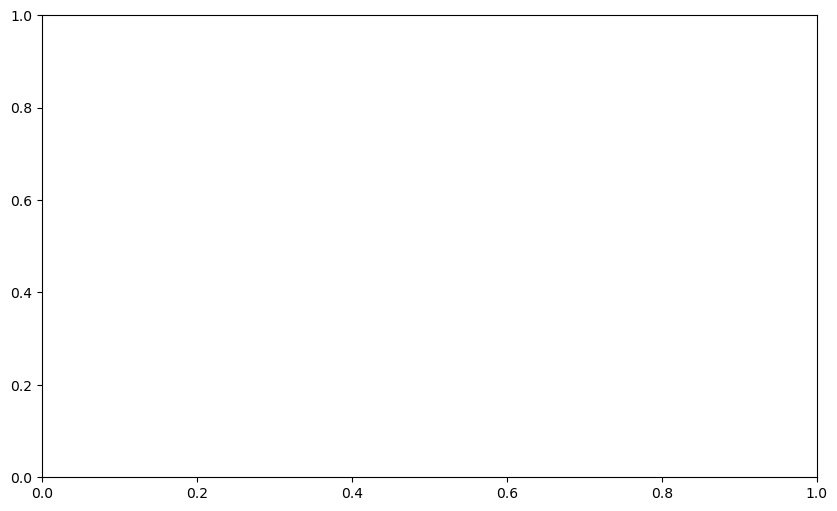

In [33]:

plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])          


ValueError: Shape of passed values is (2823, 10), indices imply (2823, 25)

In [35]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())

NameError: name 'df_feat' is not defined

In [36]:
df_feat = pd.DataFrame(scaled_features, columns=X.columns)

In [37]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())

KeyError: 'TARGET CLASS'

In [38]:
score = cross_val_score(knn, df_feat, df['DEALSIZE'], cv=10)


In [39]:
from sklearn.neighbors import KNeighborsRegressor

score = cross_val_score(KNeighborsRegressor(n_neighbors=i), df_feat, df['SALES'], cv=10)


ValueError: x and y must have same first dimension, but have shapes (39,) and (0,)

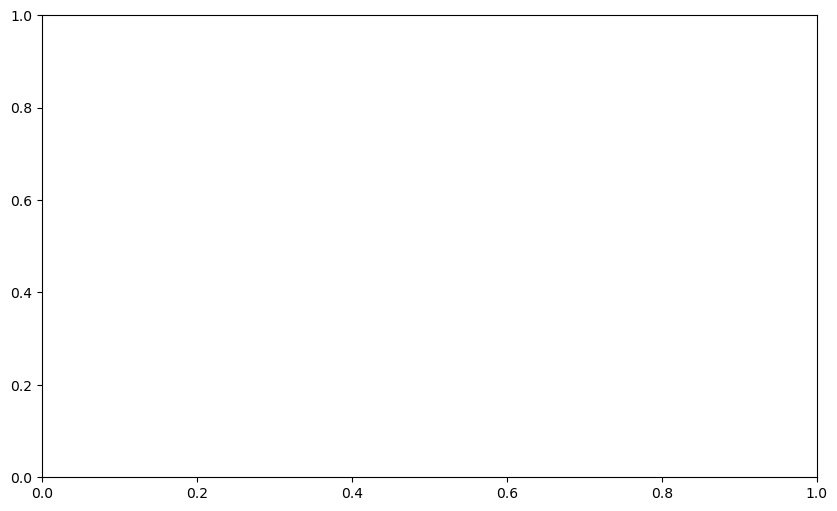

In [40]:

plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

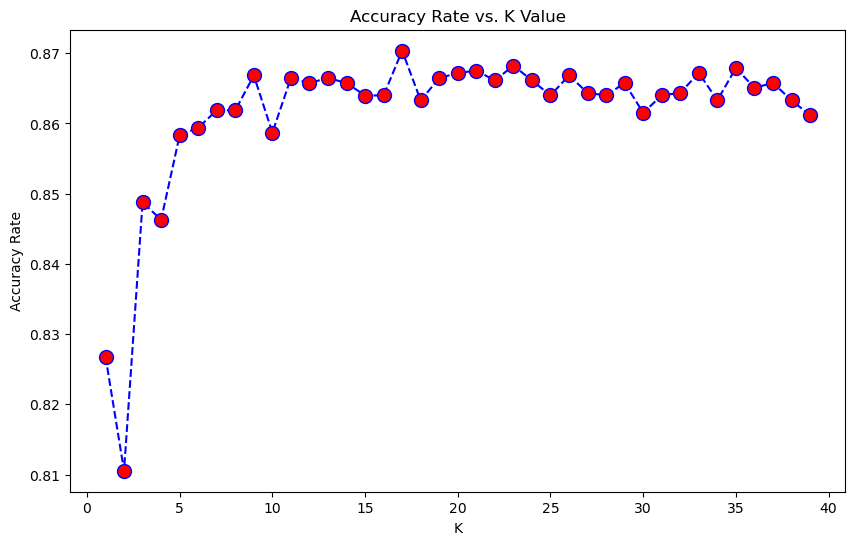

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

accuracy_rate = []

# Replace 'DEALSIZE' with your actual classification target column
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, df_feat, df['DEALSIZE'], cv=10)
    accuracy_rate.append(score.mean())

# Now plot it
plt.figure(figsize=(10,6))
plt.plot(range(1,40), accuracy_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()
